In [1]:
%pylab inline
import geopandas as gpd
import pandas as pd
import os
!pip install mplleaflet
import mplleaflet

in_data_dir = '/Users/datateam/Desktop/SASAP/ADFG/'
out_data_dir = '/Users/datateam/Desktop/SASAP/HabMetricsOut/'

infp = lambda s: os.path.join(in_data_dir, s)
outfp = lambda s: os.path.join(out_data_dir, s)

Populating the interactive namespace from numpy and matplotlib
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


# Regions

Importing shapefiles for fish passage and regional data.

In [2]:
fish_pass = infp('ADFG_fish_passage.shp')
fp = gpd.read_file(fish_pass)
regs = infp('/Users/datateam/Desktop/SASAP/HUC8_rebuild/output/sasap_regions.shp')
regions = gpd.read_file(regs)

# Culverts

I want to attribute regions with data on the impact of culverts on fish passage. 

I'll subset regions by the following data:
* Number of culverts in each category: black = culvert status unknown, green = likely adquate, grey = possibly inadequate, red = likely indequate, red and grey = uncertainty of adequacy but likely inadequate

Checking out fish passage data.

In [4]:
fp.geometry.head(5)

0    POINT (83811.68299580179 819266.9230174161)
1    POINT (213872.4420121685 2252881.915418046)
2    POINT (213536.4334304724 2250613.469241004)
3    POINT (207221.6008933298 2235195.704555048)
4    POINT (210232.8798836078 2156742.824674349)
Name: geometry, dtype: object

And checking out the region data. Regions are identified by the `region` attribute, so that'll be our key.

In [5]:
regions.head()

,region_id,region,geometry
0,1,Aleutian Islands,(POLYGON ((-1156665.959195634 420855.093106978...
1,2,Arctic,"POLYGON ((571289.9424044372 2143072.479559347,..."
2,3,Bristol Bay,(POLYGON ((-339688.5870041371 973904.876117813...
3,4,Chignik,(POLYGON ((-114381.9018728056 649966.806579366...
4,5,Copper River,"POLYGON ((561012.0068005103 1148300.750064243,..."


Before running any analysis, I'll make sure both `regions` and `fish passage` data are in the Alaska Albers projection ([epsg:3338](http://spatialreference.org/ref/epsg/3338/)).

In [3]:
fp = fp.to_crs(epsg=3338)
regions = regions.to_crs(epsg=3338)

In [4]:
fp['FP_red'] = fp['RGGRating'] == 'Red'
fp['FP_green'] = fp['RGGRating'] == 'Green'
fp['FP_gray'] = fp['RGGRating'] == 'Gray'
fp['FP_black'] = fp['RGGRating'] == 'Black'
# colors_df = pd.DataFrame[fp['FP_red']:['FP_black']]

In [5]:
RGG = fp[['geometry','FP_red', 'FP_green', 'FP_gray', 'FP_black']]
RGG

,geometry,FP_red,FP_green,FP_gray,FP_black
0,POINT (83811.68299580242 819266.9230174191),True,False,False,False
1,POINT (213872.4420121688 2252881.915418045),False,True,False,False
2,POINT (213536.4334304724 2250613.46924101),True,False,False,False
3,POINT (207221.6008933302 2235195.704555049),False,True,False,False
4,POINT (210232.879883608 2156742.824674348),True,False,False,False
5,POINT (209664.0374586324 2154568.821857522),False,True,False,False
6,POINT (209871.3299806983 2154511.249232365),False,False,False,True
7,POINT (208473.769337069 2145878.345238072),False,True,False,False
8,POINT (207819.5236787742 2140596.544095613),False,True,False,False
9,POINT (207669.1926589816 2139533.059282799),False,True,False,False


In [6]:
for reg in regions.region: # the purpose of this is to count
    sub_gdf = regions.query("region==@reg") # finds the region geodataframe (or sub of the original gdf)
    geom_ser = sub_gdf.geometry # here we are getting a series of geometries (geometry already part of gdf)
    geom = geom_ser.iloc[0] # here is our geometry object, iloc based on interger location based on indexing for selection by position
    RGG[reg] = RGG.within(geom) # this is matching fp geometry and matching with region geometry?

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [8]:
RGG.head()

,geometry,FP_red,FP_green,FP_gray,FP_black,Aleutian Islands,Arctic,Bristol Bay,Chignik,Copper River,Kodiak,Kotzebue,Kuskokwim,Cook Inlet,Norton Sound,Prince William Sound,Southeast,Yukon
0,POINT (83811.68299580242 819266.9230174191),True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1,POINT (213872.4420121688 2252881.915418045),False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
2,POINT (213536.4334304724 2250613.46924101),True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
3,POINT (207221.6008933302 2235195.704555049),False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
4,POINT (210232.879883608 2156742.824674348),True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False


In [9]:
type(RGG)

geopandas.geodataframe.GeoDataFrame

# Count of Culverts per Region

To count culverts for each region, I'll first create an intersection dataframe showing culvert points as `True` or `False` for intersection with regional geometries.

In [16]:
# for reg in regions.region:
#     geom = regions.query("region==@reg").geometry.iloc[0]
#     fp[reg] = fp.intersects(geom)

This is the above for loop broken down

In [8]:
for reg in regions.region: # the purpose of this is to count
    sub_gdf = regions.query("region==@reg") # finds the region geodataframe (or sub of the original gdf)
    geom_ser = sub_gdf.geometry # here we are getting a series of geometries (geometry already part of gdf)
    geom = geom_ser.iloc[0] # here is our geometry object, iloc based on interger location based on indexing for selection by position
    fp[reg] = fp.within(geom) # this is matching fp geometry and matching with region geometry?
    #within gives T/F
    # so this loop must have manipulated the gdf?
    # So I guess I don't need to worry about the geometry in fp because it's number of culverts per regions ... just a count
# fp[reg]

In [37]:
fp[regions.region]

,Aleutian Islands,Arctic,Bristol Bay,Chignik,Copper River,Kodiak,Kotzebue,Kuskokwim,Cook Inlet,Norton Sound,Prince William Sound,Southeast,Yukon
0,False,False,False,False,False,True,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,False,False,False
5,False,True,False,False,False,False,False,False,False,False,False,False,False
6,False,True,False,False,False,False,False,False,False,False,False,False,False
7,False,True,False,False,False,False,False,False,False,False,False,False,False
8,False,True,False,False,False,False,False,False,False,False,False,False,False
9,False,True,False,False,False,False,False,False,False,False,False,False,False


In [12]:
type(fp[regions.region])

pandas.core.frame.DataFrame

...just to demonstrate one way of getting the totals of culverts per region:

In [13]:
fp[regions.region].sum(axis="rows") # sum of T/F for regions, but I don't think this has anything to do with geometry?
# the above for loop has to be run before this will work

Aleutian Islands         111
Arctic                    32
Bristol Bay               25
Chignik                    0
Copper River             205
Kodiak                   189
Kotzebue                   0
Kuskokwim                  0
Cook Inlet              1062
Norton Sound             106
Prince William Sound      43
Southeast                725
Yukon                    431
dtype: int64

In [31]:
reg = "Yukon"
sub_gdf = regions.query("region==@reg")
sub_gdf

,region_id,region,geometry,n_culverts
12,13,Yukon,POLYGON ((-375317.9778843221 1473997.623078777...,431.0


In [32]:
geom_ser = sub_gdf.geometry
geom_ser

12    POLYGON ((-375317.9778843221 1473997.623078777...
Name: geometry, dtype: object

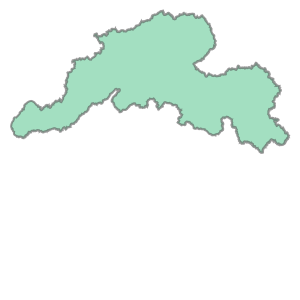

In [33]:
geom = geom_ser.iloc[0]
geom # shapely geometry object versus below geometry is just a string representation in the geodataframe

In [12]:
fp.within(geom)

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
2900    False
2901    False
2902    False
2903    False
2904    False
2905    False
2906    False
2907    False
2908    False
2909    False
2910    False
2911    False
2912    False
2913    False
2914    False
2915    False
2916    False
2917    False
2918    False
2919    False
2920    False
2921    False
2922    False
2923    False
2924    False
2925    False
2926    False
2927    False
2928    False
2929    False
Length: 2930, dtype: bool

In [13]:
regions.head()

,region_id,region,geometry
0,1,Aleutian Islands,(POLYGON ((-1156665.959195634 420855.093106978...
1,2,Arctic,"POLYGON ((571289.9424044377 2143072.479559345,..."
2,3,Bristol Bay,(POLYGON ((-339688.5870041371 973904.876117813...
3,4,Chignik,(POLYGON ((-114381.9018728056 649966.806579367...
4,5,Copper River,"POLYGON ((561012.0068005103 1148300.750064242,..."


Now, I can sum up all of those mine polygons that evaluate as `True` for regional intersection. I'll attribute that count to the `region` DataFrame. 
* I will need to change this by category - actually this may be right but I'm not sure yet, need to better understand the code - look up geopandas functions.

In [10]:
for reg in regions.region:
    n_culverts = fp[reg].sum() # summing T/F, so number culverts per region
    regions.loc[regions.region==reg, 'n_culverts'] = n_culverts # regions.region==reg is row, 'n_culverts' is column
    # locating this for each iteration
#     print(n_culverts)

In [ ]:
for rgg in fp.RGGRating:
    impact = fp[rgg]

In [20]:
rgg = 'Red'
rgg_df = fp.query("RGGRating==@rgg")
rgg_df['Copper River'].sum()

112

In [29]:
for reg in regions.region: # the purpose of this is to count
    sub_gdf = regions.query("region==@reg") # finds the region geodataframe (or sub of the original gdf)
    geom_ser = sub_gdf.geometry # here we are getting a series of geometries (geometry already part of gdf)
    geom = geom_ser.iloc[0] # here is our geometry object, iloc based on interger location based on indexing for selection by position
    fp.RGGRating[reg] = fp.within(geom) # this is matching fp geometry and matching with region geometry?
    #within gives T/F
    # so this loop must have manipulated the gdf?
    # So I guess I don't need to worry about the geometry in fp because it's number of culverts per regions ... just a count

In [31]:
type(fp.RGGRating[reg])

pandas.core.series.Series

In [35]:
for reg in regions.region: # not quite doing what I want it to
    impact = fp.RGGRating[reg].sum() # summing T/F, so number culverts per region
    regions.loc[regions.region==reg, 'impact'] = impact # regions.region==reg is row, 'n_culverts' is column
    # locating this for each iteration
#     print(n_culverts)

In [35]:
regions.region == "Arctic"

0     False
1      True
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
Name: region, dtype: bool

Number of culverts

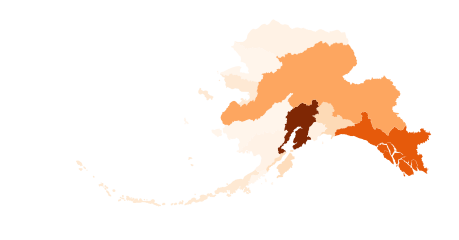

In [37]:
fig, ax = subplots(1,1,figsize=(7,7))
ax = regions.plot(column='n_culverts', cmap='Oranges', ax=ax, linewidth=0.4)
ax.set_axis_off()
# foo = ax.axes.set_aspect('equal')

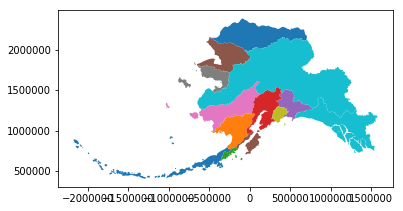

In [12]:
regions.plot(column = 'region')

In [23]:
regions.sort_values(by='n_culverts', ascending=False).head(8)
# this is a parameter in sort_values of kind so this might be what you want to look into: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html
# regions.sort_values(by='n_fishpass', ascending=False, kind=).head(8)




,region_id,region,geometry,n_fishpass,n_culverts
8,9,Cook Inlet,"(POLYGON ((35214.97605528704 1002456.87086566,...",1062.0,1062.0
11,12,Southeast,(POLYGON ((1287776.763303713 744574.0859671872...,725.0,725.0
12,13,Yukon,POLYGON ((-375317.9778843221 1473997.623078778...,431.0,431.0
4,5,Copper River,"POLYGON ((561012.0068005103 1148300.750064243,...",205.0,205.0
5,6,Kodiak,(POLYGON ((115112.5187827438 983292.9990368477...,189.0,189.0
0,1,Aleutian Islands,(POLYGON ((-1156665.959195634 420855.093106978...,111.0,111.0
9,10,Norton Sound,(POLYGON ((-848356.9600070227 1636692.01922057...,106.0,106.0
10,11,Prince William Sound,"(POLYGON ((426007.0728565209 1087250.37311214,...",43.0,43.0


# Average Area of Mining Footprints

I'll look at the `Shape_Area` attribute of those mining footprints we counted above to find the average area of footprints intersecting each region. Since I'm interested in the characteristics of the mining footprints, I won't clip mining area to regional boundaries.

In [16]:
for reg in regions.region:
    mines_reg = mines[mines[reg]]
    avg_m_area = mines_reg.Shape_Area.mean() * 1e-6
    regions.loc[regions.region==reg, 'avg_m_area'] = avg_m_area

Converting `NaN` values to 0 for those regions without any intersecting mines.

In [17]:
regions['avg_m_area'] = regions['avg_m_area'].fillna(0)

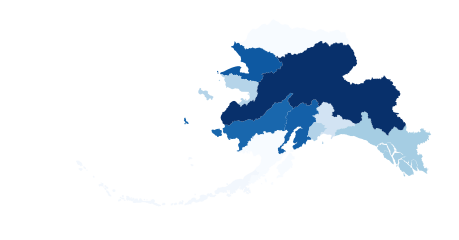

In [18]:
fig, ax = subplots(1,1,figsize=(7,7))
ax = regions.plot(column='avg_m_area', cmap='Blues', ax=ax, linewidth=0.4)
ax.set_axis_off()
foo = ax.axes.set_aspect('equal')

# Area per Region and Density of Mining Footprints

Now, I'm interested in mining data specific to each region:
* Area of each region covered by mining footprints and 
* Density, defined as ($\frac{mining\,footprint\,area}{regional\,area}$).

For these analyses, I'll have to union mining polygons and clip the resulting shape to regional boundaries. From there, I can evaluate the area of each region covered by mining activity.

In [19]:
for reg in regions.region:
    mines_reg = mines[mines[reg]]
    mines_union = mines_reg.unary_union
    regions_union = regions.query("region==@reg").unary_union
    mines_reg_clip = mines_union.intersection(regions_union)
    regions.loc[regions.region==reg, 'area_mines'] = mines_reg_clip.area * 1e-6

Now, it's one more quick step to find density using the `area_mines` attribute from the previous analysis.

In [20]:
regions['density_mines'] = regions.area_mines/(regions.area * 1e-6)

In [21]:
regions.sort_values(by='density_mines', ascending = False).head()

,region_id,region,geometry,n_mines,avg_m_area,area_mines,density_mines
12,13,Yukon,POLYGON ((-375317.9778843221 1473997.623078777...,391.0,2.212924,864.999527,0.001003
9,10,Norton Sound,(POLYGON ((-848356.9600070229 1636692.01922057...,70.0,0.670258,45.939046,0.000687
8,9,Cook Inlet,"(POLYGON ((35214.97605528703 1002456.87086566,...",24.0,1.804829,51.127322,0.000450
7,8,Kuskokwim,(POLYGON ((-1030125.203115781 1281198.22296843...,26.0,1.743793,45.338615,0.000276
6,7,Kotzebue,(POLYGON ((-678815.2871972915 1819518.97119244...,17.0,1.862390,26.074320,0.000199


Let's map this out. It looks like even though the Yukon region is very large, it also has the highest density of mining impact areas.

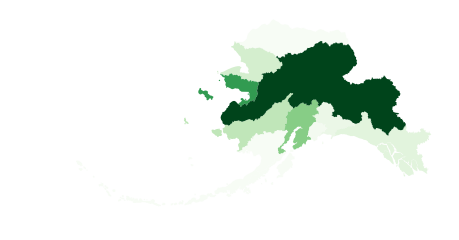

In [22]:
fig, ax = subplots(1,1,figsize=(7,7))
ax = regions.plot(column='density_mines', cmap='Greens', ax=ax, linewidth=0.4)
ax.set_axis_off()
foo = ax.axes.set_aspect('equal')

Export the results to shapefile and csv formats. I need to drop the "geometry" field in order to export to csv.

In [23]:
regions.to_file(outfp('Regions_with_Mines.shp'))
regions.drop('geometry', axis='columns').to_csv(outfp('Regions_with_Mines.csv'))

# Watersheds

I'm going to run the same analysis as above, but for watersheds. To reiterate, these attributes are:
* Number of mining footprints (mining impact areas) intersecting each watershed.
* Average area of those mining footprints.
* Area (km<sup>2</sup>) impacted by mining within watershed boundaries (area clipped to regional or watershed boundaries).
* Density of mining areas defined as ($\frac{mining\,footprint\,area}{watershed\,area}$).

First, I'll import the watersheds shapefile and convert to the Alaska Albers projection.

In [24]:
watersheds_fp = "/Users/datateam/Desktop/SASAP/HUC8_rebuild/output/sasap_watersheds_gapfix.shp"
watersheds = gpd.read_file(watersheds_fp).to_crs(epsg=3338)

Create the intersection DataFrame.

In [25]:
for wat in watersheds.id_numeric:
    geom = watersheds.query("id_numeric==@wat").geometry.iloc[0]
    mines[wat] = mines.intersects(geom)

Find the number of mining footprints (impact areas) per watershed.

In [26]:
for wat in watersheds.id_numeric:
    n_mines = mines[wat].sum()
    watersheds.loc[watersheds.id_numeric==wat, 'n_mines'] = n_mines

Map the data. I'll decrease the line width on region borders a bit so that we can visualize this better.

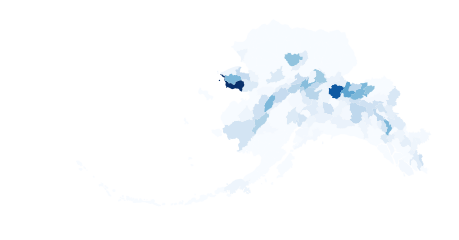

In [27]:
fig, ax = subplots(1,1,figsize=(7,7))
ax = watersheds.plot(column='n_mines', cmap='Blues', ax=ax, linewidth=0.2)
ax.set_axis_off()
foo = ax.axes.set_aspect('equal')

Find the mean area of mining footprints intersecting each watershed.

In [28]:
for wat in watersheds.id_numeric:
    mines_wat = mines[mines[wat]]
    avg_m_area = mines_wat.Shape_Area.mean() * 1e-6
    watersheds.loc[watersheds.id_numeric==wat, 'avg_m_area'] = avg_m_area

In [29]:
watersheds.avg_m_area = watersheds.avg_m_area.fillna(0)

Find the area of mining footprints within watershed boundaires, then find the density = ($\frac{mining\,footprint\,area}{watershed\,area}$).

In [30]:
for wat in watersheds.id_numeric:
    mines_wat = mines[mines[wat]]
    mines_union = mines_wat.unary_union
    watersheds_union = watersheds.query("id_numeric==@wat").unary_union
    mines_reg_clip = mines_union.intersection(watersheds_union)
    watersheds.loc[watersheds.id_numeric==wat, 'area_mines'] = mines_reg_clip.area * 1e-6

In [31]:
watersheds['density_mines'] = watersheds.area_mines/(watersheds.area * 1e-6)

Finally, I'll export the results to shapefile and csv formats.

In [32]:
watersheds.to_file(outfp('Watersheds_with_Mines.shp'))
watersheds.drop('geometry', axis='columns').to_csv(outfp('Watersheds_with_Mines.csv'))